# Pymaceuticals Inc.
---

### Analysis

There are a few observations to note from the data collected.

- Out of all the drug regimens tested Capomulin and Ramicane had the most noticeable effect on the Tumor Volumes of their mice. This is not a factor of a small sample size either as both had the most timepoints of any Drug Regimen.
    - It would make sense then that reducing the Tumor Volumes led to more data on each mice as the mice lasted longer with reduced tumor sizes. Many of the other drugs stopped testing at earlier timepoints, possibly from the mice not lasting as long.

- Ratio of sex with the mice across all trials is roughly equal. The sex of the mice should have no noticeable effect on data collected. We could be more specific and track sex across different variables like how long female mice lasted vs male mice and the ratio of sex per drug to be more confident in this observation.

- The box plots we created support our initial observation that Capomulin and Ramicane had a noticeable increase in effectivity vs our other two samples in Infubinol and Ceftamin.
    - The line plot of a single mouse with Capomulin shows the drastic decrease in tumor size over time. Just peering at the data in our clean table for other drugs does not support a similar expected line graph from any of their mice albeit one outlier from infubinol.

- Surprisingly from our final plot comparing weight and tumor volume we see a very high correlation between the weight of a mouse and how large their average tumor volume is.
    - This does make me wonder if there is a correlation between sex of mice and weight. If male mice have a higher average weight then we could deduce that they would have higher average tumor volumes as well. With the assumption that larger tumor volumes lead to quicker mice expiration then perhaps there would be a correlation between sex and how long a mice lasts?


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_full = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
study_data_unique = study_data_full.loc[study_data_full['Timepoint'] == 0]
study_data_unique


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [21]:
# Checking the number of mice.
study_data_unique.count()


Mouse ID              250
Timepoint             250
Tumor Volume (mm3)    250
Metastatic Sites      250
Drug Regimen          250
Sex                   250
Age_months            250
Weight (g)            250
dtype: int64

In [3]:
study_data_full.loc[study_data_full['Drug Regimen'] == 'Propriva']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
...,...,...,...,...,...,...,...,...
1608,c927,20,55.481689,1,Propriva,Female,4,26
1609,c927,25,56.545519,2,Propriva,Female,4,26
1610,c927,30,60.753925,2,Propriva,Female,4,26
1611,c927,35,61.872274,3,Propriva,Female,4,26


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = study_data_unique[study_data_unique.duplicated(keep='last')]
duplicate['Mouse ID'].values

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = duplicate.iloc[0]['Mouse ID']
duplicate

duplicate_info = study_data_full.loc[study_data_full['Mouse ID'] == duplicate]
duplicate_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_clean = study_data_unique.drop(index=860)
study_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [7]:
# Checking the number of mice in the clean DataFrame.
study_data_clean['Mouse ID'].count()

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

per_drug = study_data_full.groupby('Drug Regimen')

#-----------------------------------------------------

mean_per_drug = per_drug['Tumor Volume (mm3)'].mean()


median_per_drug = per_drug['Tumor Volume (mm3)'].median()
median_per_drug

var_per_drug = per_drug['Tumor Volume (mm3)'].var()
var_per_drug

std_dev_per_drug = per_drug['Tumor Volume (mm3)'].std()
std_dev_per_drug

std_err_per_drug = per_drug['Tumor Volume (mm3)'].sem()
std_err_per_drug

summary_statistics = pd.DataFrame()
summary_statistics['Mean Tumor Volume'] = mean_per_drug
summary_statistics['Median Tumor Volume'] = median_per_drug
summary_statistics['Tumor Volume Variance'] = var_per_drug
summary_statistics['Tumor Volume Std. Dev.'] = std_dev_per_drug
summary_statistics['Tumor Volume Std. Err.'] = std_err_per_drug

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
study_data_full.groupby('Drug Regimen').aggregate({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

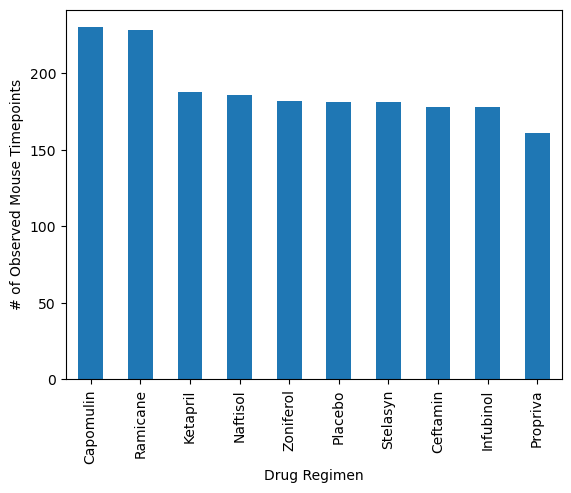

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count = study_data_full.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

drug_count.plot(kind='bar', facecolor = 'tab:blue', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

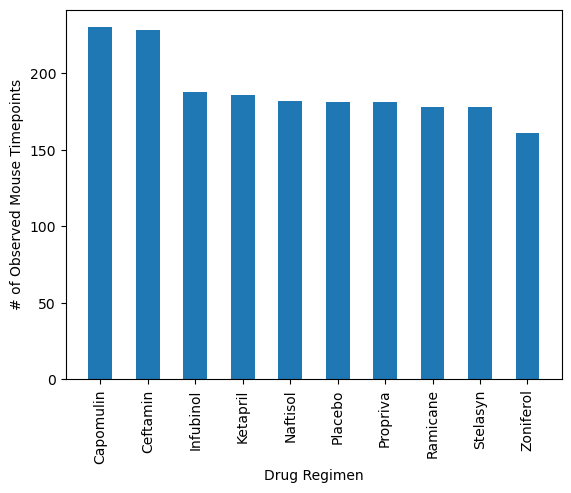

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(summary_statistics.index, per_drug['Mouse ID'].count().sort_values(ascending=False),
         color = 'tab:blue', width=0.5)
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Sex'>

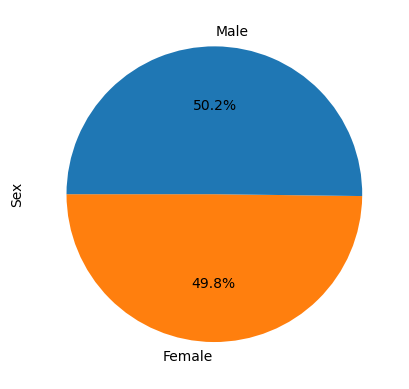

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_pct = study_data_clean.groupby('Sex')['Mouse ID'].count() / len(study_data_clean) * 100
colors = ['tab:orange', 'tab:blue']
study_data_clean.groupby('Sex')['Mouse ID'].count().plot(kind='pie',colors=colors, autopct='%1.1f%%', ylabel='Sex', startangle = 180)

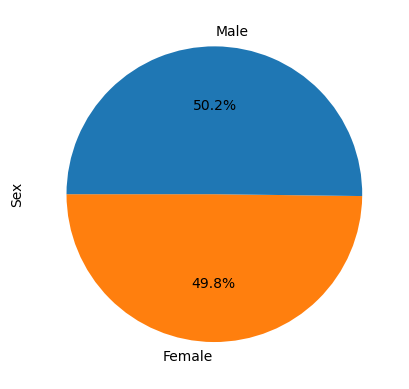

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ['Female', 'Male']
colors = ['tab:orange', 'tab:blue']
sex_pct = study_data_clean.groupby('Sex')['Mouse ID'].count() / len(study_data_clean) * 100

plt.pie(sex_pct, labels=genders, colors=colors, autopct='%1.1f%%', startangle=180)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = pd.DataFrame()
last_timepoints['Greatest Timepoint'] = study_data_full.groupby('Mouse ID')['Timepoint'].max()
last_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
study_w_max = pd.merge(study_data_full, last_timepoints,on='Mouse ID')
final_tumor_volumes = study_w_max.loc[study_w_max['Timepoint'] == study_w_max['Greatest Timepoint']]
final_tumor_volumes.reset_index(drop=True)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Greatest Timepoint
0,b128,45,38.982878,2,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,35,71.905117,0,Ketapril,Female,2,29,35
3,a457,10,49.783419,0,Ketapril,Female,11,30,10
4,c819,40,62.175705,1,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17,45
245,i557,45,47.685963,1,Capomulin,Female,1,24,45
246,m957,45,33.329098,1,Capomulin,Female,3,19,45
247,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


#Created a list of lists to index the treatments with
tumor_vols = [[] for x in treatments]


for mouse in final_tumor_volumes.itertuples():

    #Found from the errors it was denoting the columns as 0,1,2 etc., 
    #so I changed index to accompanying integers. 
    # 5 refers to the Drug Regimens, 3 to Tumor Volume, etc.

    #Used try to skip the errors on Drug Regimens not within the treatments list
    try: 
        index = treatments.index(mouse[5])
    except ValueError:
        continue

    # Locate the rows which contain mice on each drug and get the tumor volume
    tumor_vols[index].append(mouse[3])
    

#Finding values for each treatment. Indexes match for tumor_vols and treatments
#so the same value is used to index each
for i in range(len(treatments)):


    quartiles = np.quantile(tumor_vols[i], [.25,.5,.75])
    lowerq = quartiles[0]
    upperq = quartiles[2]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    print(f'{treatments[i]}\'s potential outliers: ', end='')
    
    outliers = []

    for x in tumor_vols[i]:

        if x < lower_bound or x > upper_bound:

            outliers.append(x)
    
    print(outliers)


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


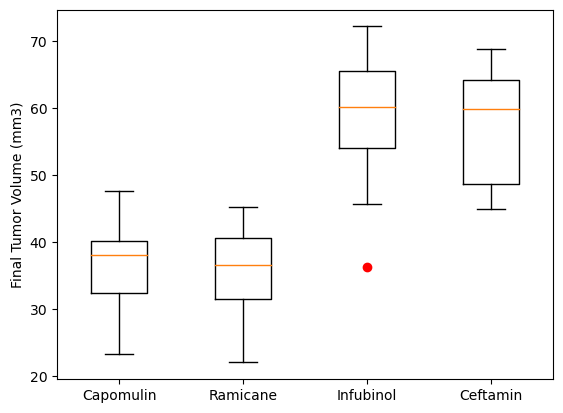

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
ax1 = plt.subplot()
ax1.boxplot(tumor_vols, labels=treatments, sym='ro')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

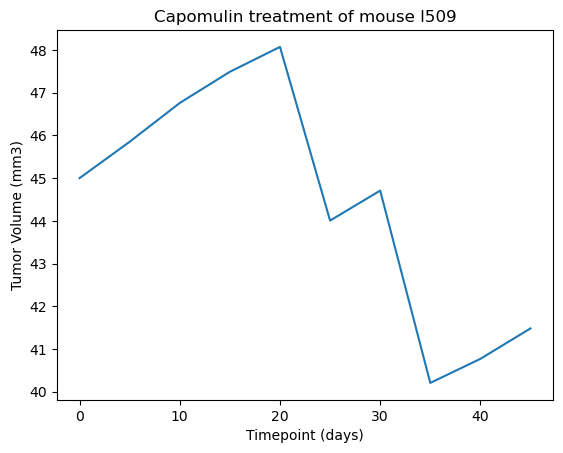

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
study_509 = study_data_full.loc[study_data_full['Mouse ID'] == 'l509']

tumor_vol_509 = study_509['Tumor Volume (mm3)']
time_509 = study_509['Timepoint']

plt.plot(time_509, tumor_vol_509)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

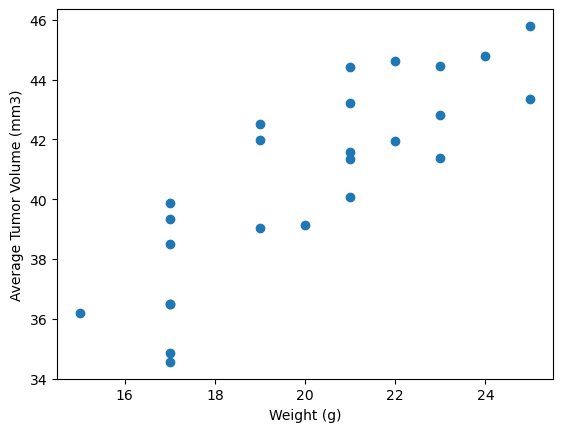

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_vs_vol = study_data_full.loc[study_data_full['Drug Regimen'] == 'Capomulin']

average_vol_per_mouse = weight_vs_vol.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = weight_vs_vol.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(mouse_weight, average_vol_per_mouse)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


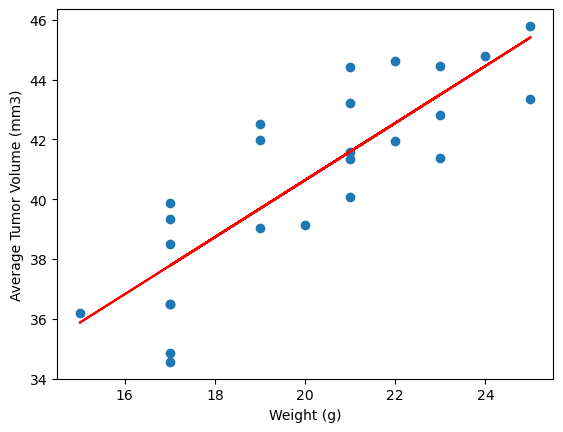

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
wt_slope, wt_int, wt_r, wt_p, wt_std_err = st.linregress(mouse_weight, average_vol_per_mouse)
wt_fit = wt_slope * mouse_weight + wt_int

print(f'The correlation between mouse weight and the average tumor volume is \
{round(st.pearsonr(mouse_weight, average_vol_per_mouse)[0],2)}')

plt.scatter(mouse_weight, average_vol_per_mouse)
plt.plot(mouse_weight, wt_fit, '-', color = 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()